<h1 style="color:#6D8764; background-color:#f2f2f2; padding:20px; text-align:center"> Data analysis aviation accident </h1>

<h1 style="color:#00ABA9; background-color:#f2f2f2; padding:10px; text-align:center"> Part I </h1>

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import numpy as np  


aviation_accident_data_df = pd.read_csv('aviation_accident_data.csv')  
aviation_accident_data_df.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        23408 non-null  object 
 1   type        23933 non-null  object 
 2   operator    23963 non-null  object 
 3   fatalities  20029 non-null  float64
 4   country     23129 non-null  object 
 5   cat         23967 non-null  object 
 6   year        23906 non-null  float64
dtypes: float64(2), object(5)
memory usage: 1.3+ MB


<h1 style="color:#6D8764; background-color:#f2f2f2; padding:10px; text-align:center">Questions 1,2</h1>

q1 : In total there are 23967 Observations orgenized in 7 columns. 
q2 : As described below. 

In [2]:
cols = ['date', 'type', 'operator', 'fatalities', 'country', 'cat', 'year']

for col in cols:
    missing_values = aviation_accident_data_df[col].isnull().sum()
    print(f"Column '{col}' has {missing_values} missing value(s).")

Column 'date' has 559 missing value(s).
Column 'type' has 34 missing value(s).
Column 'operator' has 4 missing value(s).
Column 'fatalities' has 3938 missing value(s).
Column 'country' has 838 missing value(s).
Column 'cat' has 0 missing value(s).
Column 'year' has 61 missing value(s).


<h1 style="color:#6D8764; background-color:#f2f2f2; padding:10px; text-align:center">Question 3</h1>

q3 : As described below - in total there are 4 types of aircraft with at least 500 documented accidents. 

In [3]:
plain_types_count = aviation_accident_data_df['type'].value_counts()

aircraft_types = plain_types_count[plain_types_count >= 500].index.tolist()

print ("At least 500 documented accidents : ") 
for types in aircraft_types : 
    print (types)
    

At least 500 documented accidents : 
Douglas C-47A (DC-3)
Douglas C-47 (DC-3)
Douglas C-47B (DC-3)
Curtiss C-46A


<h1 style="color:#6D8764; background-color:#f2f2f2; padding:10px; text-align:center">Question 4</h1>

In [4]:
accident_by_country = aviation_accident_data_df.groupby('country')['cat'].count()
accident_by_country = accident_by_country.reset_index()

usa_accidents = accident_by_country[accident_by_country['country'] == 'USA']['cat'].values[0]
total_accidents = 23967 #as written in q1 this is the number of accidents in total in the file.

percentage_usa = (usa_accidents / total_accidents ) * 100
percentage_usa_rounded = round(percentage_usa, 2)

print("Percentage of accidents in the United States:", percentage_usa_rounded, "%")


Percentage of accidents in the United States: 18.26 %


The percentage of aviation accidents in the USA  among all accidents in the world is:18.26 %

<h1 style="color:#6D8764; background-color:#f2f2f2; padding:10px; text-align:center">Question 5</h1>

In [5]:
deadliest_category = aviation_accident_data_df.groupby('cat')['fatalities'].mean()

deadliest_category = deadliest_category.reset_index()
pivot_table = pd.pivot_table(deadliest_category, index='cat', values='fatalities')
display(pivot_table)

,fatalities
cat,
A1,8.338233
A2,0.062728
C1,9.273478
C2,0.642857
H1,85.523810
H2,0.172710
I1,0.000000
I2,0.000000
O1,0.079533


q5 : The deadliest category of accidents on average is: H1 - Hijacking, hull-loss.

<h1 style="color:#6D8764; background-color:#f2f2f2; padding:10px; text-align:center">Question 6</h1>

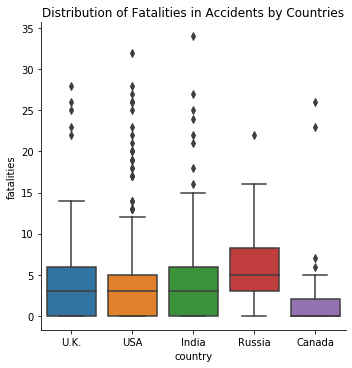

In [6]:
gb_country = aviation_accident_data_df.groupby('country').size().sort_values(ascending=False)
#size is counting how much observation there is in each group

gb_country=gb_country.nlargest(5).reset_index()
#takes the 5 countries with the largest numbe of observation, meaning, had most accidents. 

filtered_df = aviation_accident_data_df[aviation_accident_data_df['type'].isin(aircraft_types) & aviation_accident_data_df['country'].isin(gb_country['country'])]

sns.catplot(x="country", y="fatalities", kind='box', data=filtered_df)
plt.title('Distribution of Fatalities in Accidents by Countries')
plt.show()


q6: a. As you can see in the graph, the 5 countries that passed the filter are: UK, USA, India, Russia and Canada. 
       In each country we can see : Minimum, first quarter, median, third quarter and maximum
       b. The median in the graph is shown by the line inside the box. Among all the boxes you can see that the highest line 
       is Russia.Therefore it has the highest median number of fatalities.

<h1 style="color:#6D8764; background-color:#f2f2f2; padding:10px; text-align:center">Question 7</h1>

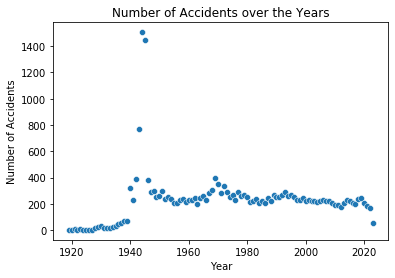

In [7]:
accidents_by_year = aviation_accident_data_df.groupby('year').size()
accidents_df = pd.DataFrame({'year': accidents_by_year.index, 'accidents': accidents_by_year.values})
sns.scatterplot(data=accidents_df, x='year', y='accidents')

# Setting the plot title and labels
plt.title('Number of Accidents over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')

plt.show()

q7 : We Grouped our data by year and calculated the total number of accidents for each year. 
    According to the graph we received, it seems that there is no linear correlation between the data. 
    It cannot be said that as the number of years increases, so the number of accidents increases or decreases.

<h1 style="color:#6D8764; background-color:#f2f2f2; padding:10px; text-align:center">Question 8</h1>

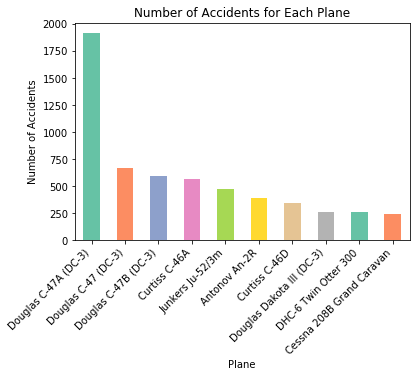

Douglas C-47A (DC-3)         1916
Douglas C-47 (DC-3)           669
Douglas C-47B (DC-3)          592
Curtiss C-46A                 564
Junkers Ju-52/3m              471
Antonov An-2R                 391
Curtiss C-46D                 344
Douglas Dakota III (DC-3)     262
DHC-6 Twin Otter 300          258
Cessna 208B Grand Caravan     247
Name: type, dtype: int64

In [8]:
top_10_plains = plain_types_count.sort_values(ascending=False).nlargest(10)

color_palette = sns.color_palette('Set2', len(plain_types_count))
ax = top_10_plains.plot(kind='bar', color=color_palette)

plt.title('Number of Accidents for Each Plane')
plt.xlabel('Plane')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')

plt.show()
top_10_plains

q8: The top 10 planes with the most accidents :
    1.Douglas C-47A (DC-3)
    2.Douglas C-47 (DC-3)
    3.Douglas C-47B (DC-3)
    4.Curtiss C-46A
    5.Junkers Ju-52/3m
    6.Antonov An-2R  
    7.Curtiss C-46D
    8.Douglas Dakota III (DC-3)
    9.DHC-6 Twin Otter 300 
    10.Cessna 208B Grand Carava

<h1 style="color:#6D8764; background-color:#f2f2f2; padding:10px; text-align:center">Question 9</h1>

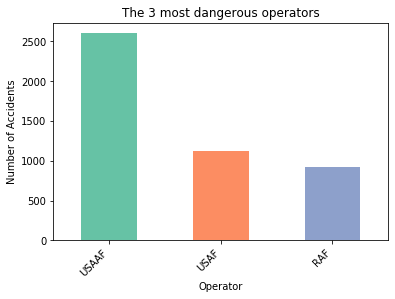

operator
USAAF    2604
USAF     1120
RAF       920
dtype: int64


In [9]:
operator_accident = aviation_accident_data_df.groupby('operator').size()
filtered_operators = aviation_accident_data_df[aviation_accident_data_df['type'].isin(top_10_plains.index)]['operator'].unique()
top_3_operators = operator_accident[operator_accident.index.isin(filtered_operators)].nlargest(3)

color_palette = sns.color_palette('Set2', len(plain_types_count))
ax = top_3_operators.plot(kind='bar', color=color_palette)

plt.title('The 3 most dangerous operators')
plt.xlabel('Operator')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')

plt.show()

print(top_3_operators)

q9: The most 3 dangerous operators are:
    1. USAAF with 2604 accidents
    2. USAF with 1120 accidents
    3. RAF with 920 accidents

<h1 style="color:#6D8764; background-color:#f2f2f2; padding:10px; text-align:center">Question 10</h1>

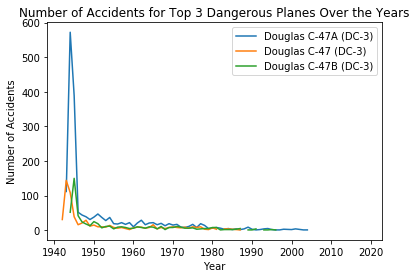

In [10]:
# Filter to the three planes with the most accidents
top_3_planes = aviation_accident_data_df.groupby('type').size().nlargest(3)

# Finding the plane names of the three most dangerous planes
top_3_planes_names = top_3_planes.index.tolist()

# Filtering only for planes that are in the three most dangerous group
top_3_planes_data = aviation_accident_data_df[aviation_accident_data_df['type'].isin(top_3_planes_names)]

# Calculation of the number of accidents for each plane and year
accidents_count = top_3_planes_data.groupby(['type', 'year']).size()

# Creating a pivot for the number of accidents by plane and year
pivot_table = accidents_count.unstack(level='type')



for plane in top_3_planes_names:
    plt.plot(pivot_table.index, pivot_table[plane], label=plane)

plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents for Top 3 Dangerous Planes Over the Years')

plt.legend()
plt.show()


q10: 
A. The number of accidents of the three most dangerous planes appears to decrease over the years. 
   We think that there are several explanations for this: 
   1.Advancements in technology and safety measures in the aviation industry - This have led to improved aircraft design,
   maintenance, and operational procedures.
   These advancements have contributed to a safer flying environment and reduced the likelihood of accidents. 
   2.We no longer use fighter jets today like we used to in the past.During times of war, 
   the number of aircraft accidents tends to increase due to the inherent risks associated with military operations. 


B. One unusual observation stands out between the years 1940 and the mid-1940s. During this period, World War II took place, 
    and the number of accidents involving the most dangerous planes increased significantly. The primary reason for this is the
    extensive military usage of these planes during the war. The "Douglas C-47(A/B)" model, is a well known fighter jet a that
    time. After a little reserch it was also known for its high accident rate.
    The demanding nature of combat operations, coupled with the conditions of war, likely contributed to the surge in accidents 
    during this specific time frame.

<h1 style="color:#00ABA9; background-color:#f2f2f2; padding:10px; text-align:center"> Part II </h1>

<h1 style="color:#6D8764; background-color:#f2f2f2; padding:10px; text-align:center">Questions 1</h1>

176.60585193730617

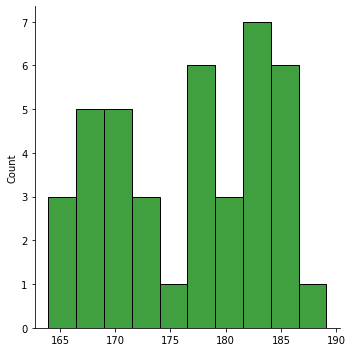

In [11]:
expectation_mean = 175 # as given 
std = 6 # as given 
sample_size = 40 # number of shows sampled

random_array = np.random.normal(expectation_mean, std, sample_size)

sns.displot(data=random_array, bins=10, color='green')

random_array_mean=random_array.mean()
random_array_mean

Q1: a. The above graph is the graph that describes the empirical distribution, not the real one. 
    We produce a simulation from a small sample according to the conditions in the population but this is not the real
    distribution.
    
    b.The average obtained is constantly changing because in each run of the code, our array receives different values 
    and accordingly calculates the average. You can see the value printed above the graph, but currently the calculated 
    average is 175.665 
    
    c.The distribution we currently received is a left-leaning distribution, with 2 peaks.
    If we took a sample size of 100, the shape of the distribution would tend to change because we have more data, 
    and the resulting information would be closer to the true mean. We would probably get a distribution that is more 
    symmetrical than skewed to one side and we would also probably get a 1 peak. 

<h1 style="color:#6D8764; background-color:#f2f2f2; padding:10px; text-align:center">Questions 2</h1>

       
$$ H_0: p = 175 cm \\
H_1: p < 175 cm
$$
        

Q2. A - H0: The average height in the population is 175 cm
        H1: The average height in the population is less then 175 cm
        

The p-value is 0.9635


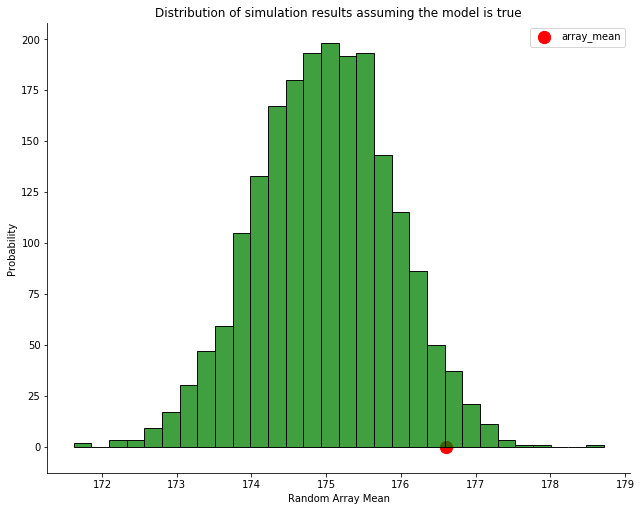

In [12]:
num_repetitions = 2000
expectation_mean=175
std=6
sample_size=40
test_statistic = random_array_mean

distribution_heights = np.empty(num_repetitions) # collection array

def one_simulation():
    array_mean = np.random.normal(expectation_mean, std, sample_size).mean()
    return array_mean

for i in range(num_repetitions):
    distribution_heights[i] = one_simulation()

#Because we supposedly don't know what the average in the population is, we use and compare in relation to the result 
#that came out in the previous question - random_array_mean. 
num_simulations_like_data_or_more_extreme = np.count_nonzero(distribution_heights <= test_statistic) 
print(f'The p-value is {num_simulations_like_data_or_more_extreme/num_repetitions}')

facetgrid_obj = sns.displot(distribution_heights, bins=30, stat='count', color='green')  # Specify the number of bins
facetgrid_obj.fig.set_size_inches(10, 7)
facetgrid_obj.set(title='Distribution of simulation results assuming the model is true', xlabel='Random Array Mean', ylabel='Probability')
facetgrid_obj.axes[0, 0].scatter(random_array_mean, 0, s=150, color='red')  # draw observed value
facetgrid_obj.axes[0, 0].legend(['array_mean'])
plt.show()


B. According to the distribution of the graph, it seems that the average height is around 175 cm - the highest column

C. *p*-value is intended to quantify the idea of statistical significance of observed results from sample data. 
    The main idea is to show how likely the sample results are under the H0 hypothesis.
    Every time we run the code we will get a different P value,
    For this specific time the p value is 0.767 for test statistic 175.66.

D.To determine whether to reject or accept the null hypothesis at different significance levels, we need to compare the 
    calculated p-value with the chosen significance level.
    Given that the p-value is around 0.5: 
    At a significance level of 0.01: Since the p-value is greater than the significance level we would fail to reject the null
    hypothesis. This means that there is not enough evidence to conclude that the average height is significantly less 
    than 175 cm.

    At a significance level of 0.1: Again, the p-value is greater than the significance level,so we would fail to reject the 
    null hypothesis. Similar to the previous case, there is not enoght evidence to suggest that the average height is 
    significantly lower than 175 cm.

    In both cases, since the p-value is greater than the chosen significance levels, we do not have enough evidence to reject
    the null hypothesis, measning we would accept the null hypothesis that the average height is 175 cm.


<h1 style="color:#6D8764; background-color:#f2f2f2; padding:10px; text-align:center">Questions 3</h1>

In [13]:
#In this question we receive a small sample from a population - sample heights and we want to perform a calculation 
# regarding some measure whether the average height of the entire population is less than or equal to the average mean_0 
# that we receive from the user of the function.

def get_p_value_hights (sample_hights, n, mean_0): 
    std = 6
    num_repetitions = 1500
    sample_size = n
    statistic = sample_hights.mean()
    
    #simulating once
    def one_simulation():
        simulation_sample = np.random.normal(mean_0, std, sample_size).mean()
        return simulation_sample

   
    #simulate num_repetitions times
    hights = np.empty(num_repetitions)
    for i in range(num_repetitions):
        hights[i] = one_simulation()
    
    num_observations_like_data_or_extreme = np.count_nonzero(hights <= statistic) 
    p_value = num_observations_like_data_or_extreme / num_repetitions
    return p_value


Q3: We have implemented the function to calculate P-value in general, so that a person can enter his database, 
    its size and what his null hypothesis is and we can tell him what his p value is.

<h1 style="color:#6D8764; background-color:#f2f2f2; padding:10px; text-align:center">Questions 4</h1>

A.  We assume that the 5000 p-value's histogram distribution will be like a normal distribution - bell (Gaussian) as we saw on
    lecture. When we do simulation to sample hundreds and thousands of times, the distribution will act like this. 
    The P-value is defined as the probability under the assumption of no effect or no difference, of obtaining a result equal to or more extreme that what 
    was actually observed.

In [ ]:

n_iterations = 5000
p_values = np.empty(n_iterations)

for i in range(n_iterations):
    heights_sample = np.random.normal(175, 6, 40)
    p_values[i] = get_p_value_hights(heights_sample, 40, 175)


sns.histplot(p_values, bins=20)
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.title('Histogram of p-values')
plt.show()



C. The P-value's distribution is like a Gaussian function more or less, and the distribution is like we answer on the 4.A question

In [ ]:
def calculate_p_value_percentage(p_values):
    below_threshold_count = np.count_nonzero(p_values < 0.05)
    percentage = (below_threshold_count / len(p_values)) * 100
    return percentage

percentage_below_threshold = calculate_p_value_percentage(p_values)
print(f"Percentage of p-values below 0.05: {percentage_below_threshold}%")

4.D  The p-value represents the probability of observing data as extreme or more extreme than the observed data, assuming the null hypothesis is true. A p-value of 0.05 is commonly used as a threshold for statistical significance. If the p-value is smaller than 0.05, it suggests strong evidence against the null hypothesis. Therefore, it is reasonable for the percentage of values smaller than 0.05 to be close to zero, as it indicates that the observed data is unlikely to have occurred by chance alone under the null hypothesis.

<h1 style="color:#6D8764; background-color:#f2f2f2; padding:10px; text-align:center">Questions 5</h1>

If we change the value of n to 200 in the provided code, it will affect the resulting histogram. With n = 200, we iterate through the process 5000 times, where each time we calculate the p-value and check if it is below the threshold value of 0.05. With a larger value of n, such as 200, the advantage is that we have a larger sample size from the population, which provides us with higher accuracy in estimating the p-value.

When n is larger, we may expect to have more accuracy in our p-value estimation. In the histogram, you may observe that the distribution of p-values is likely to become more concentrated and closer to the value of 0.05. Additionally, there might be an increase in the density at the center of the histogram.

In [ ]:
n_iterations = 5000
p_values = np.empty(n_iterations)

for i in range(n_iterations):
    heights_sample = np.random.normal(175, 6, 200)
    p_values[i] = get_p_value_hights(heights_sample, 200, 175)

sns.histplot(p_values, bins=20)
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.title('Histogram of p-values')
plt.show()